In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [36]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

In [37]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [38]:
df.shape

(614, 13)

In [39]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [41]:
df['Loan_Amount_Term'].nunique()

10

In [42]:
df['Dependents'].nunique()

4

In [43]:

df['LoanAmount'].nunique()

203

In [44]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [45]:
columns=['Loan_Amount_Term',"Dependents",'Credit_History','Gender','Married','Self_Employed']

In [46]:
# filling above columns null values with mode
for col in columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [47]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [48]:
# dropping unnecessary columns
df.drop(['Loan_ID'],axis=1,inplace=True)

In [49]:
df.shape

(614, 12)

In [50]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,85.587325,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

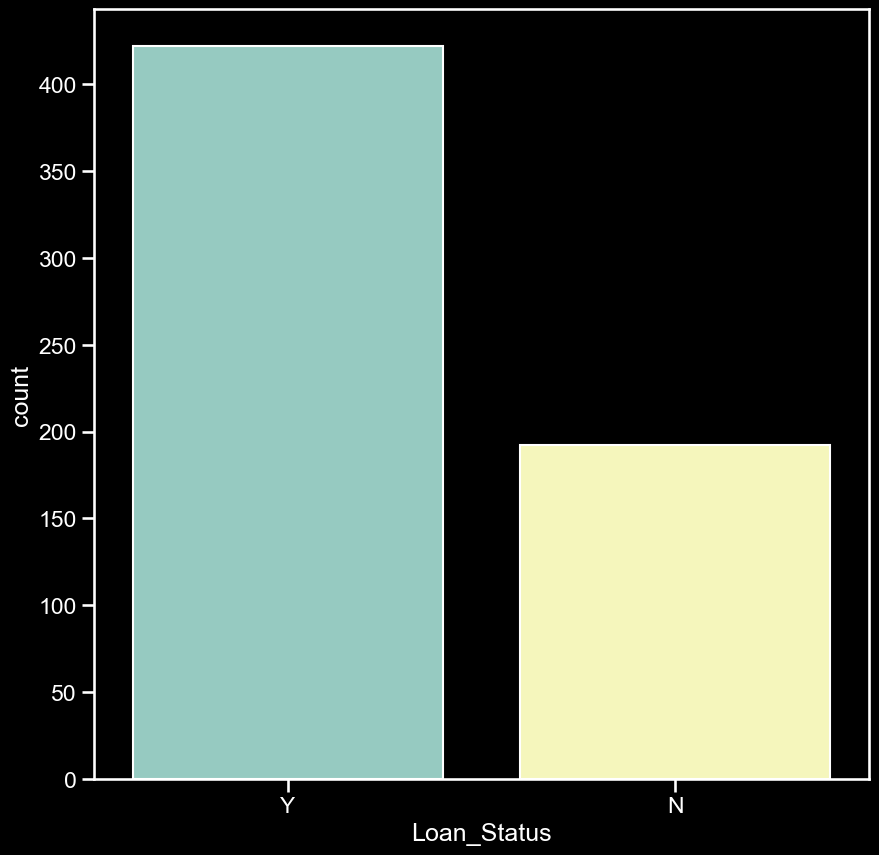

In [51]:
sns.countplot(df['Loan_Status'])

EDA

In [53]:
import matplotlib.pyplot as plt

In [54]:
dfcorr=df.corr()

<AxesSubplot:>

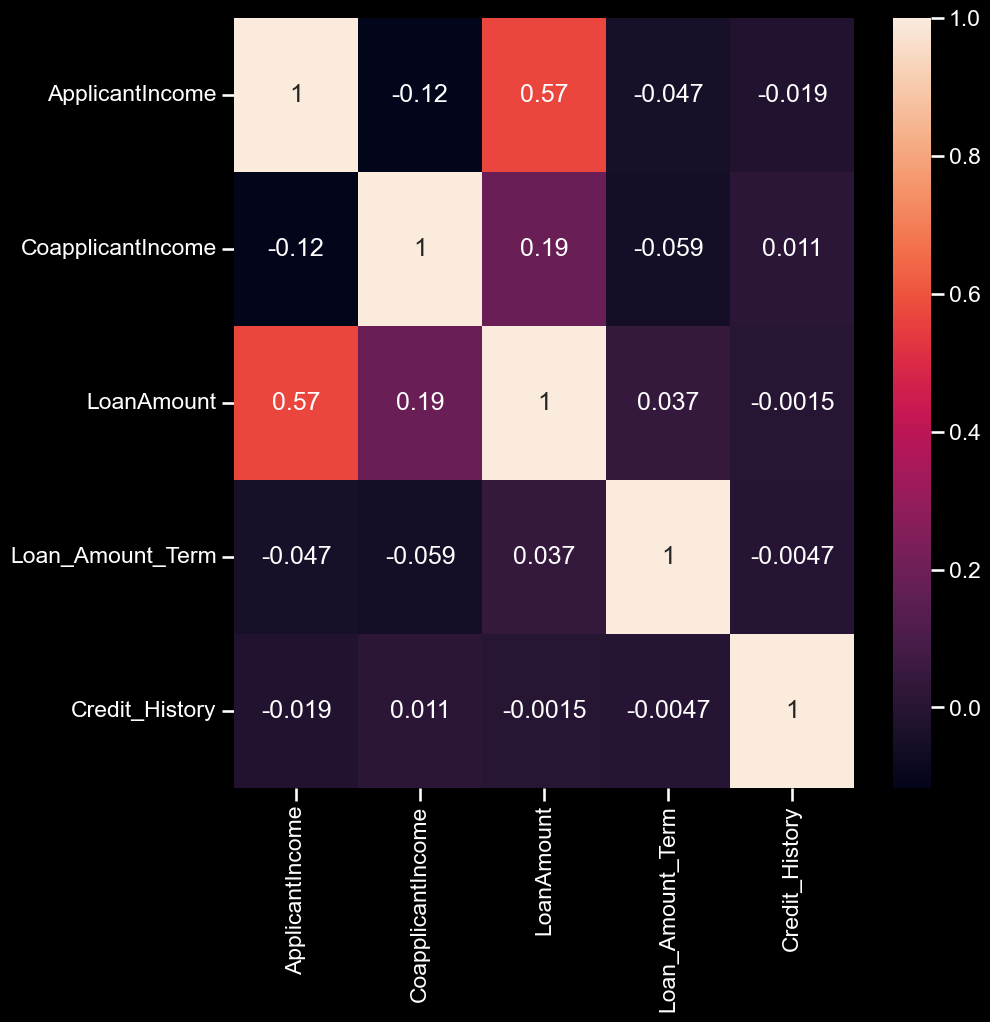

In [55]:
sns.heatmap(dfcorr,annot=True)

We can not notice LoanAmount is correlated with ApplicantIncome

all the other featurs are negatively correlated with each other

In [56]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


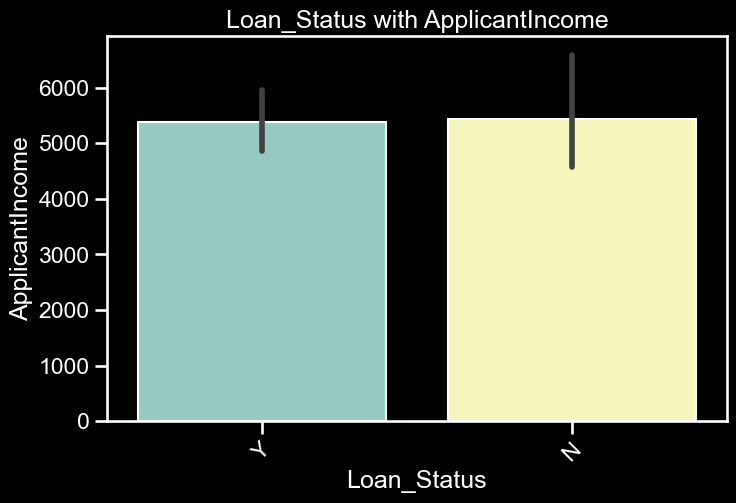

In [57]:
plt.figure(figsize=(8,5))
sns.barplot(y='ApplicantIncome',x='Loan_Status',data=df)
plt.title("Loan_Status with ApplicantIncome")
plt.xticks(rotation=45)
plt.show()

Chances are equal it doesn't matter with ApplicantIncome

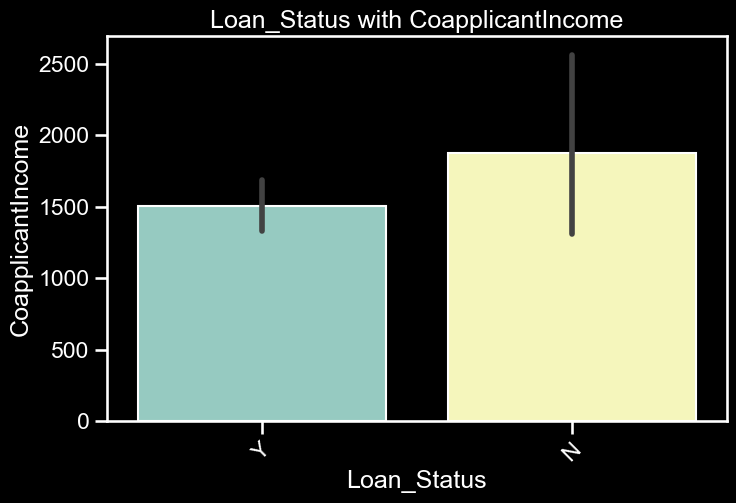

In [59]:
plt.figure(figsize=(8,5))
sns.barplot(y='CoapplicantIncome',x='Loan_Status',data=df)
plt.title("Loan_Status with CoapplicantIncome")
plt.xticks(rotation=45)
plt.show()

Here we notice some interesting figure there are chances not to be approved donts matter if CoapplicantIncome is high might be thats depends on all other figutres

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

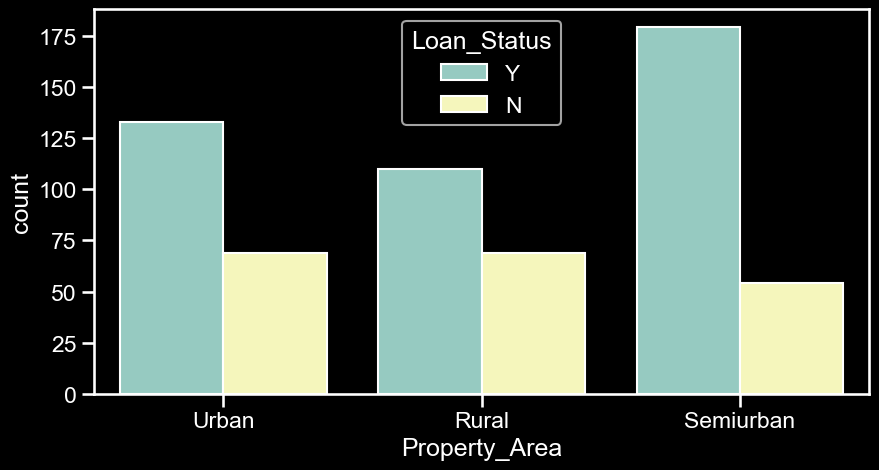

In [60]:
plt.figure(figsize=(10,5))
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

People those are from Urban area having 50-50 chances of approval depends and other parameters as well

In RuralProperty_area not approval chances are increasing

In Semiurban area there are high chances to get approval

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

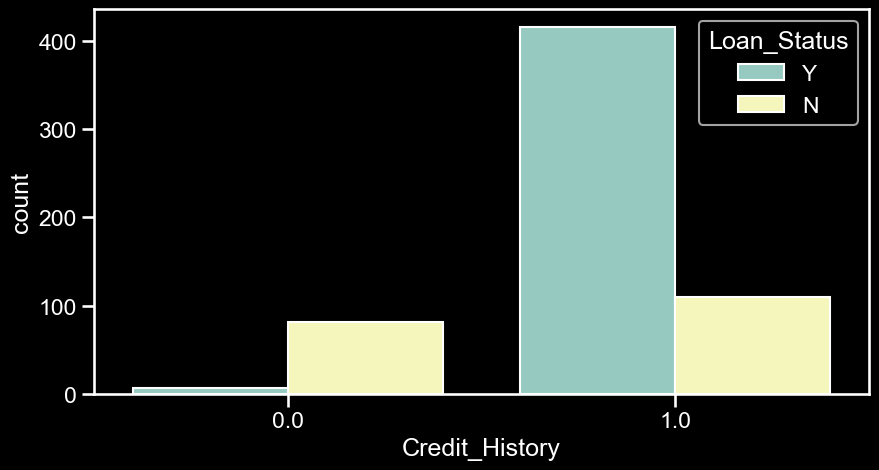

In [61]:
plt.figure(figsize=(10,5))
sns.countplot(x='Credit_History',hue='Loan_Status',data=df)

Here we have the logical figure most of the people those are not getting approval, not having credit hsitory

the people those having credit history, most of them getting approval

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

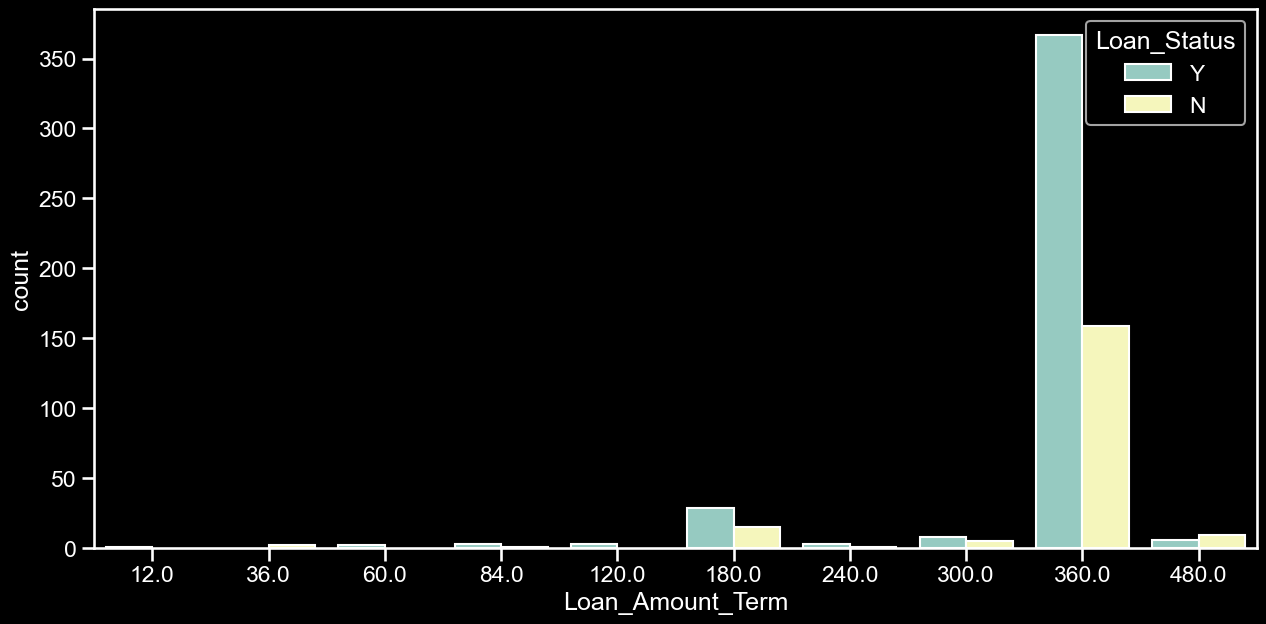

In [62]:
plt.figure(figsize=(15,7))
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=df)

Most of the people who applied for loan asked for 360 months of term more half are getting approved

People those are taking loan for 480 months, most of them are not getting approval

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

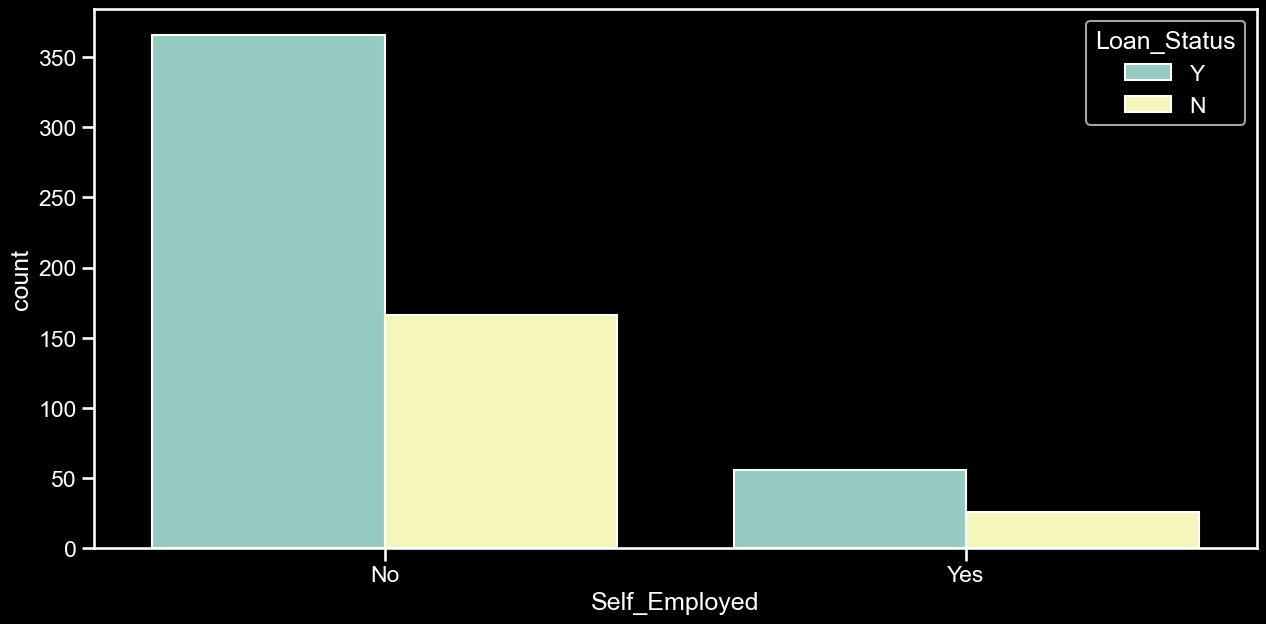

In [63]:
plt.figure(figsize=(15,7))
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

In self_employed we see there around 50% of diffrence between approved and not approved people

<AxesSubplot:xlabel='Education', ylabel='count'>

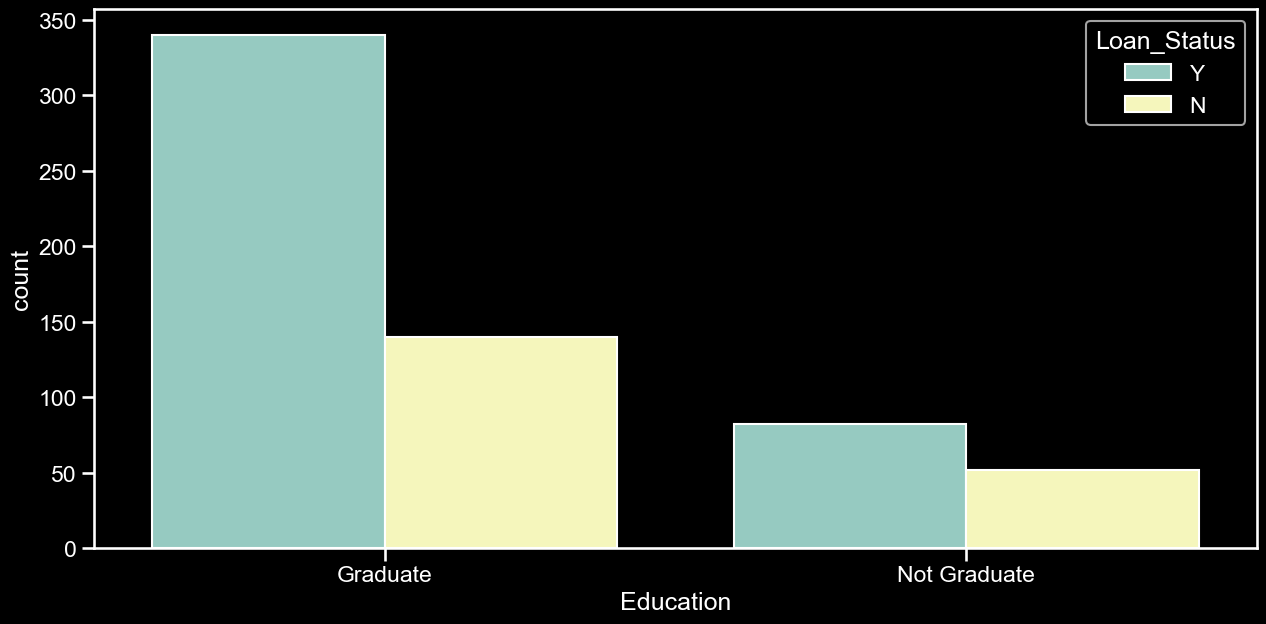

In [65]:
plt.figure(figsize=(15,7))
sns.countplot(x='Education',hue='Loan_Status',data=df)

In Graduate categ. we have around 350 approved loan and around 150 not approved

<AxesSubplot:xlabel='Dependents', ylabel='count'>

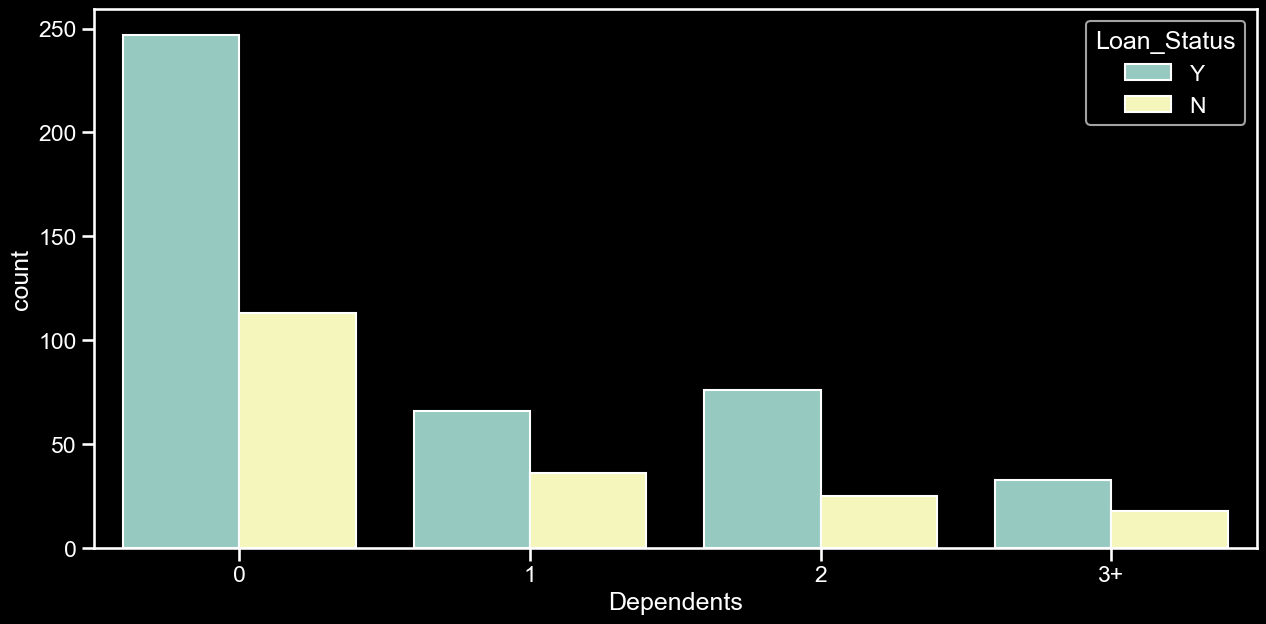

In [66]:
plt.figure(figsize=(15,7))
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

We can notice people those are not having dependents are getting chances of Loan approval

when dependents numbers are 3+ there is less chances of approval

Using LabelEncoder for convering categorical to numerical

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             614 non-null    int32
 1   Married            614 non-null    int32
 2   Dependents         614 non-null    int32
 3   Education          614 non-null    int32
 4   Self_Employed      614 non-null    int32
 5   ApplicantIncome    614 non-null    int64
 6   CoapplicantIncome  614 non-null    int64
 7   LoanAmount         614 non-null    int64
 8   Loan_Amount_Term   614 non-null    int64
 9   Credit_History     614 non-null    int64
 10  Property_Area      614 non-null    int32
 11  Loan_Status        614 non-null    int32
dtypes: int32(7), int64(5)
memory usage: 40.9 KB


All columns are converted into numerical now

### Skewness handling

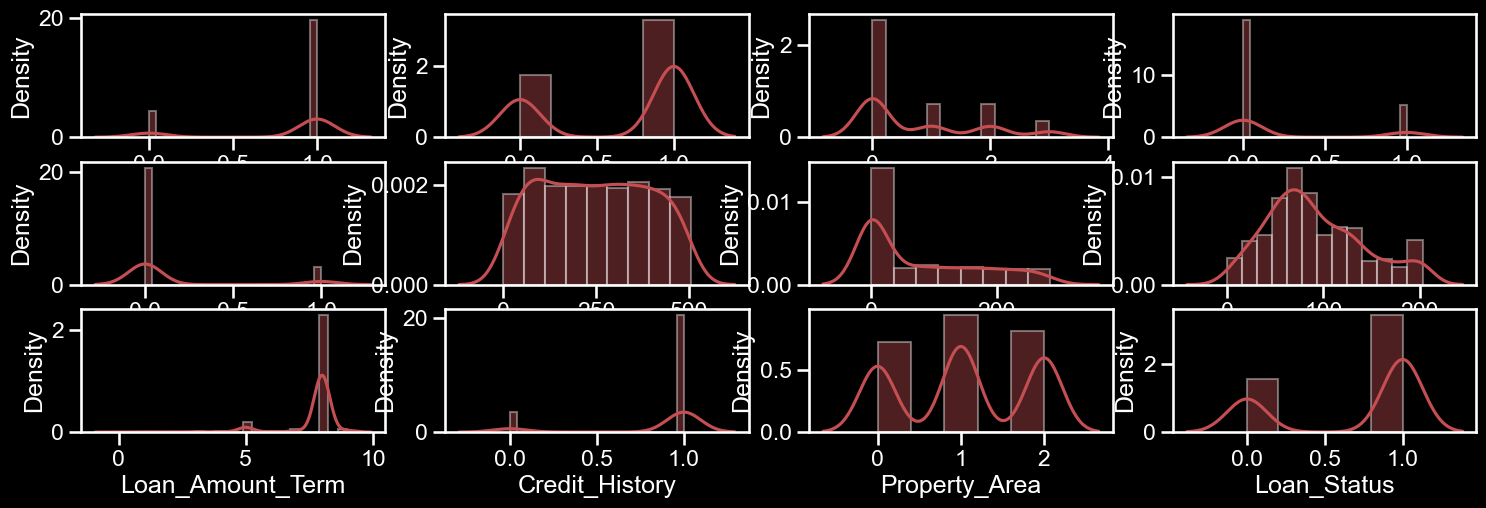

In [73]:
plt.figure(figsize=(18,15))
for i in enumerate(df.columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='r')

In [74]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.040993
CoapplicantIncome    0.780870
LoanAmount           0.555688
Loan_Amount_Term    -3.316702
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

skewness more than+/- 0.5 will we treated

object and Target column will no be treated

we can see here most of the columns are skewed,CoapplicantIncome

In [75]:

from sklearn.preprocessing import power_transform

df[['CoapplicantIncome']]=power_transform(df[['CoapplicantIncome']],method='yeo-johnson')

Checking Outliers

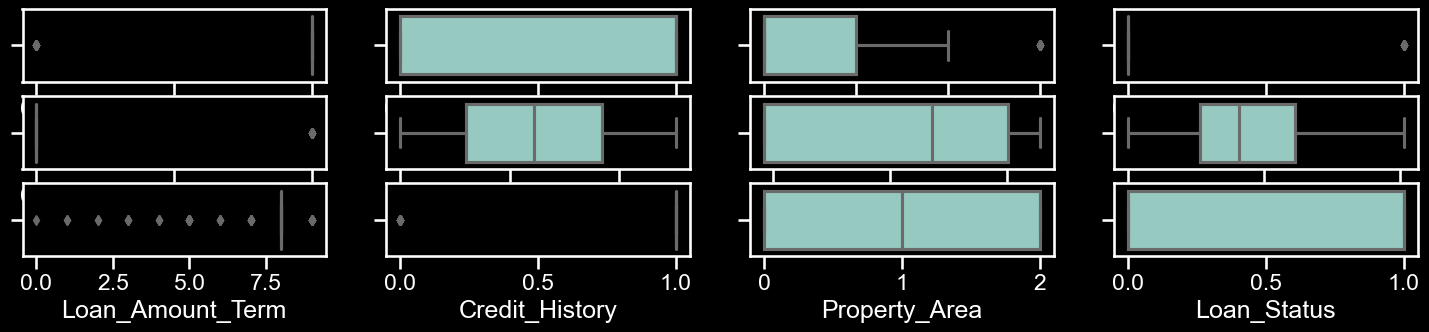

In [76]:

plt.figure(figsize=(18,10))
for o in enumerate(df):
    plt.subplot(9,4,o[0]+1)
    sns.boxplot(df[o[1]])

Only some of columns seems having outliers after skewness removed

outliers removal

In [78]:
from scipy.stats import zscore

z=np.abs(zscore(df))

print(np.where(z>3))

(array([ 14,  68,  94, 133, 242, 262, 313, 495, 497, 546, 575, 585],
      dtype=int64), array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], dtype=int64))


In [79]:
df_1=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df_1.shape)

with outliers:: (614, 12)
After removing outliers:: (602, 12)


Zscore removing 12 rows from data

### Dividing data into X and Y

In [80]:
x=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']

In [81]:
x.shape

(614, 11)

In [82]:
y.shape

(614,)

scaling X values

In [83]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [84]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [85]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.248100,0.218241,0.133550,0.490312,0.456480,0.448613,0.851972,0.855049,0.518730
std,0.386497,0.476373,0.336541,0.413389,0.340446,0.284797,0.425818,0.246850,0.123247,0.352339,0.393741
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.238591,0.000000,0.262315,0.888889,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.485119,0.608260,0.403941,0.888889,1.000000,0.500000
75%,1.000000,1.000000,0.333333,0.000000,0.000000,0.733631,0.883545,0.605911,0.888889,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Imbalanced learn
Using OverSamling_BorderlineSMOTE

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

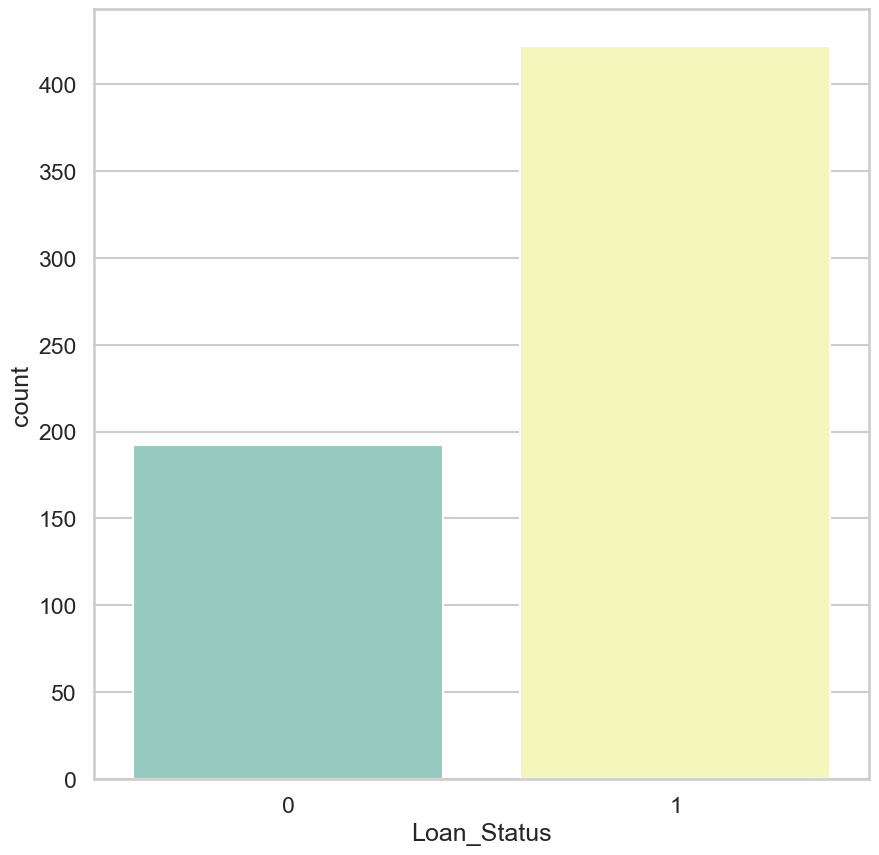

In [87]:
sns.set_style("whitegrid")
sns.countplot(x="Loan_Status", data=df)

We can see here Data is not fully balance but we'll treat the imbalace.

we have around 200 in yes and around 400 in no

In [88]:
from imblearn.over_sampling import BorderlineSMOTE
x_rus, y_rus =BorderlineSMOTE().fit_resample(x, y)
print('original  Target dataset shape:',y.shape)
print('Resample Target dataset shape',y_rus.shape)

original  Target dataset shape: (614,)
Resample Target dataset shape (844,)


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

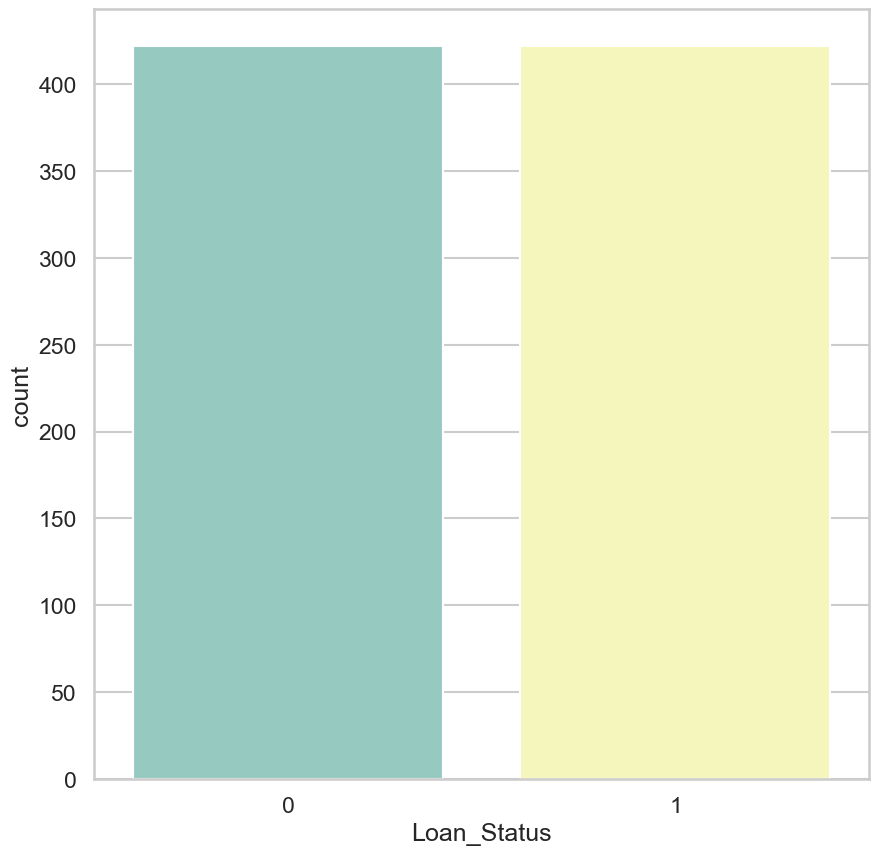

In [89]:
sns.set_style("whitegrid")
sns.countplot(y_rus)

Now we have balaced data for model training

### Spliting Train and Test data

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=.27,random_state=42)

In [92]:
x_train.shape

(616, 11)

In [93]:
x_test.shape

(228, 11)

In [94]:

y_train.shape

(616,)

In [95]:
y_test.shape

(228,)

### MODEL BUILDING:

In [96]:
#Importing necessary libraries

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

In [97]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x_rus,y_rus,cv=4,scoring='accuracy')
print("cross validation score:",np.mean(logreg_score))

cross validation score: 0.6374407582938388


### LogisticRegression

In [98]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.6008771929824561
[[54 69]
 [22 83]]
              precision    recall  f1-score   support

           0       0.71      0.44      0.54       123
           1       0.55      0.79      0.65       105

    accuracy                           0.60       228
   macro avg       0.63      0.61      0.59       228
weighted avg       0.63      0.60      0.59       228

Training accuracy:: 0.6655844155844156
Test accuracy:: 0.6008771929824561


### DECISION TREE CLASSIFIER

In [100]:

dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))

cross validation score for svm: 0.7547900817131588


In [101]:

dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.7105263157894737
[[89 34]
 [32 73]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       123
           1       0.68      0.70      0.69       105

    accuracy                           0.71       228
   macro avg       0.71      0.71      0.71       228
weighted avg       0.71      0.71      0.71       228

Training accuracy:: 1.0
Test accuracy:: 0.7105263157894737


### KNeighborsClassifier

In [102]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))

cross validation score for knn: 0.7500140884756269


In [103]:

knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.6798245614035088
[[92 31]
 [42 63]]
              precision    recall  f1-score   support

           0       0.69      0.75      0.72       123
           1       0.67      0.60      0.63       105

    accuracy                           0.68       228
   macro avg       0.68      0.67      0.67       228
weighted avg       0.68      0.68      0.68       228

Training accuracy:: 0.8327922077922078
Test accuracy:: 0.6798245614035088


### RandomForestClassifier

In [104]:

rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.8247041420118343


In [105]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.7675438596491229
[[91 32]
 [21 84]]
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       123
           1       0.72      0.80      0.76       105

    accuracy                           0.77       228
   macro avg       0.77      0.77      0.77       228
weighted avg       0.77      0.77      0.77       228

Training accuracy:: 1.0
Test accuracy:: 0.7675438596491229


### ADA BOOST CLASSIFIER

In [106]:
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))

cross validation score for Ada boost: 0.7585434173669467


In [107]:

adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

0.7105263157894737
[[81 42]
 [24 81]]
              precision    recall  f1-score   support

           0       0.77      0.66      0.71       123
           1       0.66      0.77      0.71       105

    accuracy                           0.71       228
   macro avg       0.71      0.71      0.71       228
weighted avg       0.72      0.71      0.71       228

Training accuracy:: 0.8068181818181818
Test accuracy:: 0.7105263157894737


### BAGGING CLASSIFIER

In [108]:
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for BAGGING Classifier:",np.mean(bgc_score))

cross validation score for BAGGING Classifier: 0.7809663865546218


In [109]:

bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))

0.7543859649122807
[[94 29]
 [27 78]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       123
           1       0.73      0.74      0.74       105

    accuracy                           0.75       228
   macro avg       0.75      0.75      0.75       228
weighted avg       0.75      0.75      0.75       228

Training accuracy:: 0.9918831168831169
Test accuracy:: 0.7543859649122807


### Gradient Boosting classifier

In [110]:
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))

cross validation score for Gradient Boosting Classifier: 0.7562745098039215


In [111]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))

0.7719298245614035
[[86 37]
 [15 90]]
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       123
           1       0.71      0.86      0.78       105

    accuracy                           0.77       228
   macro avg       0.78      0.78      0.77       228
weighted avg       0.79      0.77      0.77       228

Training accuracy:: 0.9155844155844156
Test accuracy:: 0.7719298245614035


### HYPER PARAMETER TUNING:

In [112]:
grbc=GradientBoostingClassifier()
param_grid={
    'criterion' : ['mse', 'mae'],
    'n_estimators':[100,200,50],
    'learning_rate':[0.1,0.5],
     'loss':['deviance', 'exponential']              
}

In [113]:
grbc_grid=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [114]:
grbc_grid.fit(x_train,y_train)
grbc_pred=grbc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,grbc_pred))

Fitting 4 folds for each of 24 candidates, totalling 96 fits
Accuracy after parameter tuning:: 0.7894736842105263


In [115]:
grbc_grid.best_params_

{'criterion': 'mse',
 'learning_rate': 0.1,
 'loss': 'deviance',
 'n_estimators': 200}

### model training with best parameters

In [116]:
best_param={
    'criterion' : ['mse'],
    'n_estimators':[100],
    'learning_rate':[0.1],
     'loss':['deviance']
}

In [117]:
best_grbc_grid=GridSearchCV(GradientBoostingClassifier(),best_param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [118]:
best_grbc_grid.fit(x_train,y_train)
best_grbc_pred=best_grbc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_grbc_pred))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Accuracy after parameter tuning:: 0.7719298245614035


As we notice after HYPER PARAMETER TUNING models accuracy score got increased

### Report of GradientBoostingClassifier

In [119]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,best_grbc_pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.85      0.70      0.77       123
           1       0.71      0.86      0.78       105

    accuracy                           0.77       228
   macro avg       0.78      0.78      0.77       228
weighted avg       0.79      0.77      0.77       228



<AxesSubplot:>

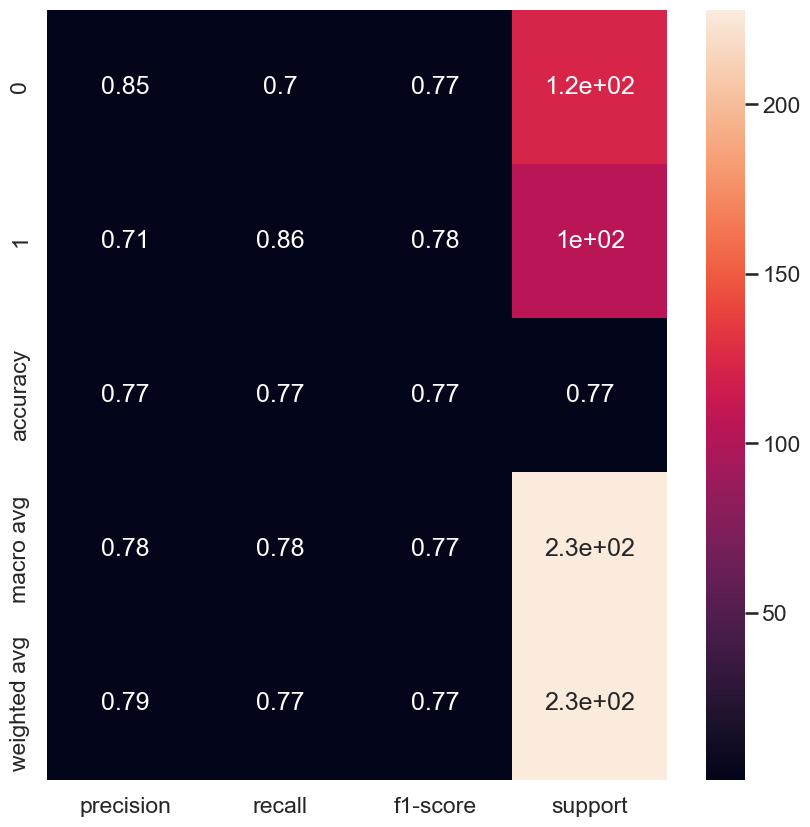

In [120]:
clsf_repo = classification_report(y_test,best_grbc_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)

In [121]:
from sklearn.metrics import roc_auc_score

In [122]:
print("roc auc score::",roc_auc_score(y_test, best_grbc_pred))

roc auc score:: 0.778164924506388


In [123]:

from sklearn.metrics import roc_curve

In [124]:
fpr1, tpr1, thresh1 = roc_curve(y_test, best_grbc_pred, pos_label=1)

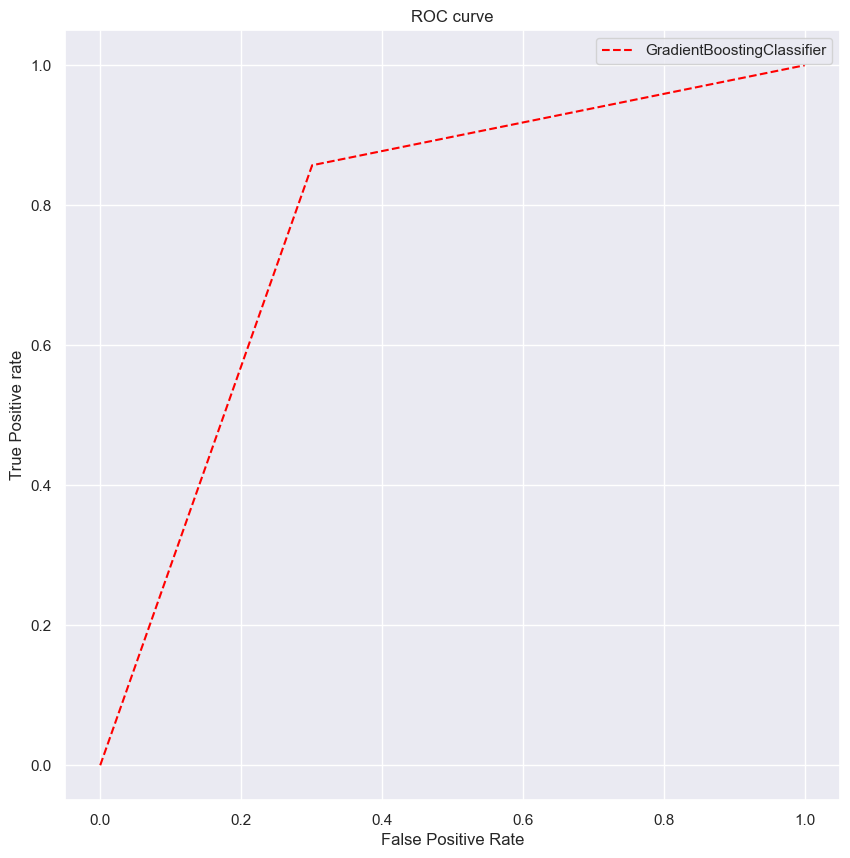

In [125]:
#plotting ROC CURVE
sns.set_theme(style="darkgrid")
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='GradientBoostingClassifier')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

#### Saving Model:

In [127]:
import joblib

In [128]:
joblib.dump(best_grbc_grid.best_estimator_,'Loan Application Status_Prediction.obj')

['Loan Application Status_Prediction.obj']